In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from astropy.table import Table
import astropy.io.fits as fits
from astropy import units as u
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord
# For downloading files
from astropy.utils.data import download_file

import pyvo as vo

In [2]:
services = vo.regsearch(servicetype='ssa',waveband='x-ray')
services.to_table()

ivoid,res_type,short_name,res_title,content_level,res_description,reference_url,creator_seq,created,updated,rights,content_type,source_format,source_value,region_of_regard,waveband,access_urls,standard_ids,intf_types,intf_roles,alt_identifier
,,,,,,,,,,,,,,deg,,,,,,
object,object,object,object,object,object,object,object,object,object,object,object,object,object,float32,object,object,object,object,object,object
ivo://nasa.heasarc/chanmaster,vs:catalogservice,Chandra,Chandra Observations,research,"This database table contains all of the observations made by the Chandra X-Ray Observatory (CXO, formerly known as the Advanced X-ray Astrophysics Facility or AXAF) as part of the Performance Verification and Calibration (PVC) phase and also contains all of the subsequent Cycles&#39; Guaranteed Time Observers (GTO) and General Observer (GO) targets, and any Director&#39;s Discretionary Time (DDT) targets that have been observed. It also includes scheduled and as-yet-not-scheduled targets. The HEASARC updates this database table on a twice-weekly basis by querying the database table at the Chandra X-Ray Center (CXC) website, as discussed in the Provenance section. For observations whose status is &#39;archived&#39;, data products can be retrieved from the HEASARC&#39;s mirror of the CXC&#39;s Chandra Data Archive (CDA). The CXC should be acknowledged as the source of Chandra data. The PVC phase was during the first few months of the CXO mission; some of the calibration observations that are for monitoring purposes will be performed in later mission cycles. All calibration data (entries with Type = CAL in this database) are placed immediately into the CXO public data archive at the Chandra X-Ray Observatory Center (CXC); please see the Web page at &lt;a href=""http://asc.harvard.edu/""&gt;http://asc.harvard.edu/&lt;/a&gt; for more information on the CXC data archive). GTO observations during Cycle 1 or any subsequent Cycle will probably occupy 100% of months 3-4, 30% of months 5-22, and 15% of the available time for the remainder of the mission. Guaranteed Time Observers will have the same proprietary data rights as General Observers (i.e., their data will be placed in the public CXC archive 12 months after they have received the data in usable form). For detailed information on the Chandra Observatory and datasets see: &lt;pre&gt; &lt;a href=""http://cxc.harvard.edu/""&gt;http://cxc.harvard.edu/&lt;/a&gt; for general Chandra information &lt;a href=""http://cxc.harvard.edu/cda/""&gt;http://cxc.harvard.edu/cda/&lt;/a&gt; for the Chandra Data Archive &lt;a href=""http://cxc.harvard.edu/cal/""&gt;http://cxc.harvard.edu/cal/&lt;/a&gt; for calibration information &lt;a href=""http://cxc.harvard.edu/caldb/""&gt;http://cxc.harvard.edu/caldb/&lt;/a&gt; for the calibration database &lt;a href=""http://cxc.harvard.edu/ciao/""&gt;http://cxc.harvard.edu/ciao/&lt;/a&gt; for data analysis &lt;a href=""http://cxc.harvard.edu/ciao/download/""&gt;http://cxc.harvard.edu/ciao/download/&lt;/a&gt; for analysis software &lt;a href=""http://cxc.harvard.edu/ciao/threads/""&gt;http://cxc.harvard.edu/ciao/threads/&lt;/a&gt; for analysis threads &lt;a href=""http://cda.harvard.edu/chaser/""&gt;http://cda.harvard.edu/chaser/&lt;/a&gt; for WebChaSeR &lt;/pre&gt;",https://heasarc.gsfc.nasa.gov/W3Browse/all/chanmaster.html,SAO/CXC; HEASARC,2024-01-12T00:00:00,2024-01-12T00:00:00,,archive,,,--,x-ray,https://heasarc.gsfc.nasa.gov/xamin/vo/ssa?table=chanmaster&,ivo://ivoa.net/std/ssa,vs:paramhttp,std,
ivo://nasa.heasarc/hitomaster,vs:catalogservice,HITOMASTER,Hitomi Master Catalog,research,"This table records high-level information for the observations obtained with Hitomi and provides access to the data archive. The Hitomi mission was launched on a JAXA H-IIA into low Earth orbit on February 17, 2016, at 5:45 pm JPS from Tanegashima Space Center. Hitomi was equipped with four different instruments that together cover a wide energy range 0.3-600 keV. The Soft X-ray Spec

In [3]:
chandra_service = [s for s in services if 'Chandra' in s.short_name][0]

In [4]:
cigar = SkyCoord.from_name("m82")
spec_tables = chandra_service.search(pos=cigar,diameter=Angle(10 *u.arcmin))
spec_tables.to_table()

obsid,status,name,ra,dec,time,detector,grating,exposure,type,pi,public_date,datalink,SSA_start_time,SSA_tmid,SSA_stop_time,SSA_duration,SSA_coord_obs,SSA_ra,SSA_dec,SSA_fov,SSA_title,SSA_reference,SSA_datalength,SSA_datamodel,SSA_instrument,SSA_publisher,SSA_format,SSA_wavelength_min,SSA_wavelength_max,SSA_bandwidth,SSA_bandpass,cloud_access
,,,deg,deg,d,,,s,,,d,,d,d,d,s,deg,deg,deg,deg,,,,,,,,m,m,m,m,
object,object,object,float64,float64,float64,object,object,float64,object,object,int32,object,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,float64,float64,float64,float64,object
23469,archived,M82 X-2,148.96267,69.67930,59457.9733,HRC-I,LETG,5040,GO,CXC,59843,25016:chandra.obs.misc,59457.9733449074,--,--,5040.0,--,148.96267,69.6793,0.81,hrcf23469N002_pha2.fits,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/byobsid/9/23469/primary/hrcf23469N002_pha2.fits.gz,2,Spectrum-1.0,HRC-I,HEASARC,application/fits,1.2398e-10,6.1992e-09,6.07522e-09,3.16159e-09,"{""aws"":{""bucket_name"":""nasa-heasarc"",""region"":""us-east-1"",""policy"":""open"",""key"":""chandra/data/byobsid/9/23469/primary/hrcf23469N002_pha2.fits.gz""}}"
19792,archived,M82 X-1,148.95917,69.67972,57642.353,ACIS-S,HETG,32440,TOO,Walton,58010,25035:chandra.obs.misc,57642.3530092593,--,--,32440.0,--,148.95917,69.67972,0.81,acisf19792N003_pha2.fits,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/byobsid/2/19792/primary/acisf19792N003_pha2.fits.gz,12,Spectrum-1.0,ACIS-S,HEASARC,application/fits,1.2398e-10,6.1992e-09,6.07522e-09,3.16159e-09,"{""aws"":{""bucket_name"":""nasa-heasarc"",""region"":""us-east-1"",""policy"":""open"",""key"":""chandra/data/byobsid/2/19792/primary/acisf19792N003_pha2.fits.gz""}}"
17860,archived,M82 X-1,148.95917,69.67972,57639.7292,ACIS-S,HETG,51060,TOO,Walton,58010,25039:chandra.obs.misc,57639.7291782407,--,--,51060.0,--,148.95917,69.67972,0.81,acisf17860N003_pha2.fits,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/byobsid/0/17860/primary/acisf17860N003_pha2.fits.gz,12,Spectrum-1.0,ACIS-S,HEASARC,application/fits,1.2398e-10,6.1992e-09,6.07522e-09,3.16159e-09,"{""aws"":{""bucket_name"":""nasa-heasarc"",""region"":""us-east-1"",""policy"":""open"",""key"":""chandra/data/byobsid/0/17860/primary/acisf17860N003_pha2.fits.gz""}}"
19791,archived,M82 X-1,148.95917,69.67972,57641.5702,ACIS-S,HETG,15310,TOO,Walton,58010,25042:chandra.obs.misc,57641.5701851852,--,--,15310.0,--,148.95917,69.67972,0.81,acisf19791N003_pha2.fits,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/byobsid/1/19791/primary/acisf19791N003_pha2.fits.gz,12,Spectrum-1.0,ACIS-S,HEASARC,application/fits,1.2398e-10,6.1992e-09,6.07522e-09,3.16159e-09,"{""aws"":{""bucket_name"":""nasa-heasarc"",""region"":""us-east-1"",""policy"":""open"",""key"":""chandra/data/byobsid/1/19791/primary/acisf19791N003_pha2.fits.gz""}}"


In [5]:
spec_data = spec_tables[0].getdataurl()
spec_data

'https://heasarc.gsfc.nasa.gov/FTP/chandra/data/byobsid/9/23469/primary/hrcf23469N002_pha2.fits.gz'

In [6]:
file_name = download_file(spec_data,cache=True)
hdu_list = fits.open(file_name)

In [7]:
hdu_list.info()

Filename: C:\Users\rushi\.astropy\cache\download\url\fec126a10e93d0fe9801a372579447c3\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SPECTRUM      1 BinTableHDU    263   2R x 13C   [1I, 1I, 1I, 1I, 1E, 1E, 16384I, 16384I, 16384E, 16384I, 16384I, 16384D, 16384D]   
  2  REGION        1 BinTableHDU    145   6R x 11C   [1I, 64A, 16A, 1E, 1E, 2E, 1E, 1I, 1I, 1I, 1I]   


In [8]:
hdu_list[1].data

FITS_rec([(1, -1, 3, 1, 16464., 16420., [    1,     2,     3, ..., 16382, 16383, 16384], [0, 0, 0, ..., 0, 1, 3], [1.8660254, 1.8660254, 1.8660254, ..., 1.8660254, 2.3228757, 2.9364917], [0, 0, 0, ..., 6, 1, 5], [0, 0, 0, ..., 1, 1, 1], [205.7875, 205.775 , 205.7625, ...,   1.025 ,   1.0125,   1.    ], [205.8   , 205.7875, 205.775 , ...,   1.0375,   1.025 ,   1.0125]),
          (2,  1, 3, 1, 16464., 16420., [    1,     2,     3, ..., 16382, 16383, 16384], [0, 0, 0, ..., 3, 1, 1], [1.8660254, 1.8660254, 1.8660254, ..., 2.9364917, 2.3228757, 2.3228757], [0, 0, 0, ..., 3, 3, 2], [0, 0, 0, ..., 1, 3, 3], [205.7875, 205.775 , 205.7625, ...,   1.025 ,   1.0125,   1.    ], [205.8   , 205.7875, 205.775 , ...,   1.0375,   1.025 ,   1.0125])],
         dtype=(numpy.record, [('SPEC_NUM', '>i2'), ('TG_M', '>i2'), ('TG_PART', '>i2'), ('TG_SRCID', '>i2'), ('X', '>f4'), ('Y', '>f4'), ('CHANNEL', '>i2', (16384,)), ('COUNTS', '>i2', (16384,)), ('STAT_ERR', '>f4', (16384,)), ('BACKGROUND_UP', '>i2', (1

In [9]:
hdu_list[1].data['CHANNEL']

array([[    1,     2,     3, ..., 16382, 16383, 16384],
       [    1,     2,     3, ..., 16382, 16383, 16384]], dtype='>i2')

In [10]:
spec_table = Table(hdu_list[1].data)
spec_table

SPEC_NUM,TG_M,TG_PART,TG_SRCID,X,Y,CHANNEL,COUNTS,STAT_ERR,BACKGROUND_UP,BACKGROUND_DOWN,BIN_LO,BIN_HI
int16,int16,int16,int16,float32,float32,int16[16384],int16[16384],float32[16384],int16[16384],int16[16384],float64[16384],float64[16384]
1,-1,3,1,16464.0,16420.0,1 .. 16384,0 .. 3,1.8660254 .. 2.9364917,0 .. 5,0 .. 1,205.78749999994977 .. 1.0,205.79999999994976 .. 1.0125
2,1,3,1,16464.0,16420.0,1 .. 16384,0 .. 1,1.8660254 .. 2.3228757,0 .. 2,0 .. 3,205.78749999994977 .. 1.0,205.79999999994976 .. 1.0125


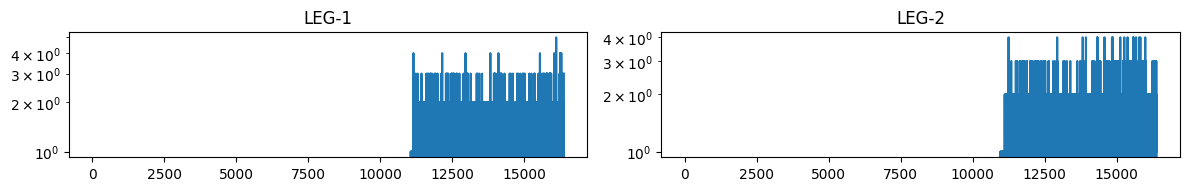

In [15]:
matplotlib.rcParams['figure.figsize'] = (12, 10)

for i in range(len(spec_table)): 
    
    ax = plt.subplot(6,2,i+1)
    pha = plt.plot( spec_table['CHANNEL'][i],spec_table['COUNTS'][i])
    ax.set_yscale('log')
    if spec_table['TG_PART'][i] == 1:
        # instr='HEG'
        ax.set_title(f'HEG-{i+1}') 

    elif spec_table['TG_PART'][i] == 2:
        # instr='MEG'
        ax.set_title(f'MEG-{i+1}') 
    elif spec_table['TG_PART'][i] == 3:
        # instr='LEG'
        ax.set_title(f'LEG-{i+1}') 
    
plt.tight_layout()